In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [5]:
df_copy = df.copy()

In [6]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [7]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

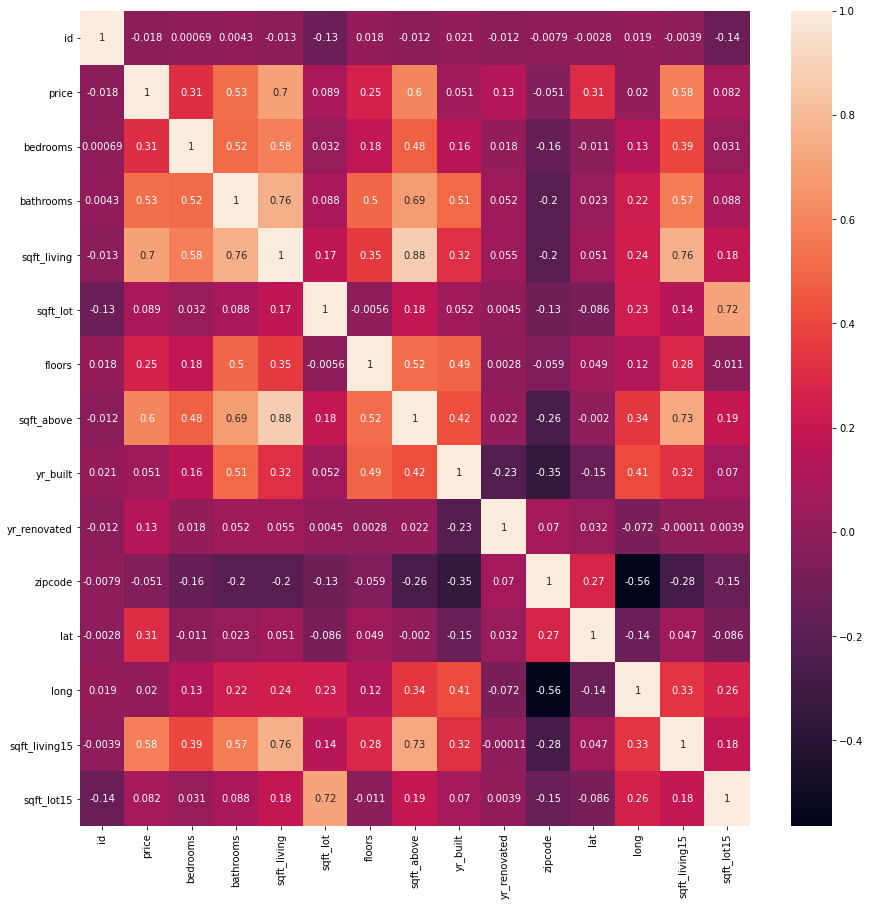

In [8]:
#looking at correlations
fig, ax = plt.subplots(figsize=(15,15))
heat = sns.heatmap(df_copy.corr(), annot = True)

In [9]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [10]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront', 'date',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement', 'zipcode', 'yr_built'],
                        inplace=True)

In [11]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
2495,300000.00,6,3.00,2400,9373,NONE,7 Average
6729,647500.00,4,1.75,2060,26036,NONE,8 Good
8404,400000.00,3,1.00,1460,43000,NONE,7 Average
8800,235000.00,3,1.00,1430,7599,NONE,6 Low Average
3553,402500.00,4,2.00,1650,3504,NONE,7 Average


In [12]:
#previous run showed a fan like residual shape and that there's a pattern so we are transform
df_copy['sqft_living'] = np.log(df_copy['sqft_living'])

In [13]:
# Establishing target and predictor variables
df_copy = df_copy[df_copy['grade'] != '3 Poor']

In [14]:
df_copy.bedrooms = df_copy.bedrooms.astype(str)

In [15]:
df_copy.bathrooms  = df_copy.bathrooms.astype(str)

In [16]:
#df_copy.zipcode = df_copy.zipcode.astype(str)

In [17]:
df_copy = df_copy.dropna(subset = ['view'])

In [18]:
X = df_copy.drop(columns = 'price')

In [19]:
y = df_copy.price

In [20]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [22]:
# Did it split correctly?
len(X_train + X_test) == len(X)

True

In [23]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [24]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     8367.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:14   Log-Likelihood:            -2.0052e+05
No. Observations:               14308   AIC:                         4.010e+05
Df Residuals:                   14306   BIC:                         4.011e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.478e+06    4.4e+04    -79.007      0.000   -3.56e+06   -3.39e+06
sqft_living  5.323e+05   5819.440     91.470      0.000    5.21e+05    5.44e+05
==============================================================================
Omnibus:                    13673.175   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1523853.432
Skew:                           4.317   Prob(JB):                         0.00
Kurtosis:                      52.815   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Get our predictions!
simple_train_preds = simple_model.predict(sm.add_constant(X_train['sqft_living']))
simple_train_preds

15502   435980.96
1841    709938.86
7083    538125.31
21100   425644.64
14513   278277.49
           ...   
11707   609204.60
525     313777.58
10941   362948.26
4776    269019.80
13098   727984.79
Length: 14308, dtype: float64

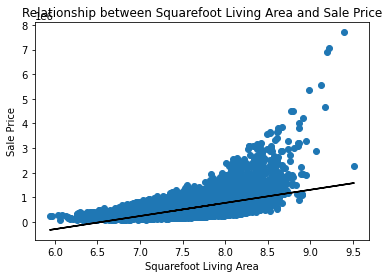

In [26]:
# Just looking at two variables

# Plot our points, rating vs balance, as a scatterplot
plt.scatter(train_df['sqft_living'], train_df['price'])

# Plot the line of best fit!
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')

plt.ylabel('Sale Price')
plt.xlabel('Squarefoot Living Area')
plt.title('Relationship between Squarefoot Living Area and Sale Price')
plt.show()

In [27]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

price           sqft_living      sqft_lot          
                mean       std        mean  std     mean       std
view                                                              
AVERAGE    791956.68 510351.93        7.79 0.43 22331.72  60261.29
EXCELLENT 1454416.19 934214.96        8.02 0.44 21762.46  35989.90
FAIR       814386.56 513226.70        7.77 0.42 12342.66  17078.17
GOOD       972849.27 615076.79        7.94 0.39 35010.67 109236.86
NONE       498348.59 287343.67        7.52 0.41 14178.52  37110.06

In [28]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [29]:
train_df['view'].value_counts()

NONE         12898
AVERAGE        640
GOOD           350
EXCELLENT      211
FAIR           209
Name: view, dtype: int64

In [30]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [31]:
train_df.grade.value_counts()

7 Average        5904
8 Good           4041
9 Better         1756
6 Low Average    1360
10 Very Good      741
11 Excellent      254
5 Fair            162
12 Luxury          64
4 Low              18
13 Mansion          8
Name: grade, dtype: int64

In [32]:
# Dropping poor row, since there is only one
df3 = train_df.copy()

In [33]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,price
15502,2,1.0,7.35,5000,FAIR,7 Average,724000.00
1841,4,2.75,7.87,8760,NONE,8 Good,762500.00
7083,3,3.5,7.54,1710,NONE,8 Good,587206.00
21100,3,3.0,7.33,1568,NONE,8 Good,474950.00
14513,3,1.0,7.06,10988,NONE,7 Average,360000.00


In [34]:
df3.grade = [x.replace(" ", "_").strip() for x in df3.grade]

In [35]:
df3['grade'].value_counts()

7_Average        5904
8_Good           4041
9_Better         1756
6_Low_Average    1360
10_Very_Good      741
11_Excellent      254
5_Fair            162
12_Luxury          64
4_Low              18
13_Mansion          8
Name: grade, dtype: int64

In [36]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10 Very Good']
df_11 = train_df[train_df['grade'] == '11 Excellent']
df_12 = train_df[train_df['grade'] == '12 Luxury']
df_4 = train_df[train_df['grade'] == '4 Low']
df_5 = train_df[train_df['grade'] == '5 Fair']
df_6 = train_df[train_df['grade'] == '6 Low Average']
df_7 = train_df[train_df['grade'] == '7 Average']
df_8 = train_df[train_df['grade'] == '8 Good']
df_9 = train_df[train_df['grade'] == '9 Better']

In [37]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'], df_12['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

0.0

In [38]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(df_grade['price'], df_grade['grade']))

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
    group1        group2       meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------
 10 Very Good  11 Excellent   434827.7141  0.001   376273.4716   493381.9566   True
 10 Very Good     12 Luxury  1205958.5192  0.001  1101035.2925   1310881.746   True
 10 Very Good    13 Mansion  3463614.7692  0.001  3177355.4722  3749874.0662   True
 10 Very Good         4 Low   -835857.453  0.001 -1027966.7224  -643748.1835   True
 10 Very Good        5 Fair  -807515.9345  0.001  -877363.3037  -737668.5653   True
 10 Very Good 6 Low Average  -755203.9867  0.001  -791975.1404  -718432.8329   True
 10 Very Good     7 Average  -655491.6383  0.001  -686877.7852  -624105.4914   True
 10 Very Good        8 Good   -517687.282  0.001  -549870.0983  -485504.4657   True
 10 Very Good      9 Better  -279304.6419  0.001  -314583.1898  -244026.0941

In [39]:
df3.view.value_counts()

NONE         12898
AVERAGE        640
GOOD           350
EXCELLENT      211
FAIR           209
Name: view, dtype: int64

In [40]:
df_copy.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'grade'],
      dtype='object')

In [41]:
#len(df_copy.zipcode.unique())

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14308 entries, 15502 to 13098
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14308 non-null  object 
 1   bathrooms    14308 non-null  object 
 2   sqft_living  14308 non-null  float64
 3   sqft_lot     14308 non-null  int64  
 4   view         14308 non-null  object 
 5   grade        14308 non-null  object 
 6   price        14308 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 894.2+ KB


In [43]:
scaler = StandardScaler()

#calling to certain columns
continous = [c for c in df3.columns if (df3[c].dtype == 'int64')| (df3[c].dtype == 'float64')]

ct = ColumnTransformer(transformers=[('scale', scaler, continous)],
                       remainder='passthrough')
ct.fit(df3)

# Transform training data

X_train_scaled = ct.transform(df3)
X_train_scaled

array([[-0.47066152237714454, -0.24176565364988822, 0.48907362882787503,
        ..., '1.0', 'FAIR', '7_Average'],
       [0.7428136401156913, -0.15538483891536076, 0.5926675279124908,
        ..., '2.75', 'NONE', '8_Good'],
       [-0.018221112956591692, -0.31734886654259975, 0.12099508775304574,
        ..., '3.5', 'NONE', '8_Good'],
       ...,
       [-0.7941541773948821, -0.12689754894971872, -0.7058887239897317,
        ..., '1.75', 'NONE', '6_Low_Average'],
       [-1.2102029733588442, -0.1668027285225576, -0.6248971301599411,
        ..., '1.75', 'NONE', '7_Average'],
       [0.8227466817687745, 0.06254292932180086, -0.43385383574415626,
        ..., '1.75', 'NONE', '7_Average']], dtype=object)

In [44]:
scaled_df = pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out())

In [45]:
scaled_df

,scale__sqft_living,scale__sqft_lot,scale__price,remainder__bedrooms,remainder__bathrooms,remainder__view,remainder__grade
0,-0.47,-0.24,0.49,2,1.0,FAIR,7_Average
1,0.74,-0.16,0.59,4,2.75,NONE,8_Good
2,-0.02,-0.32,0.12,3,3.5,NONE,8_Good
3,-0.52,-0.32,-0.18,3,3.0,NONE,8_Good
4,-1.17,-0.10,-0.49,3,1.0,NONE,7_Average
...,...,...,...,...,...,...,...
14303,0.30,-0.26,0.13,4,2.75,GOOD,7_Average
14304,-1.01,-0.15,0.50,2,2.0,NONE,7_Average
14305,-0.79,-0.13,-0.71,2,1.75,NONE,6_Low_Average
14306,-1.21,-0.17,-0.62,3,1.75,NONE,7_Average


In [46]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14308 entries, 0 to 14307
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   scale__sqft_living    14308 non-null  object
 1   scale__sqft_lot       14308 non-null  object
 2   scale__price          14308 non-null  object
 3   remainder__bedrooms   14308 non-null  object
 4   remainder__bathrooms  14308 non-null  object
 5   remainder__view       14308 non-null  object
 6   remainder__grade      14308 non-null  object
dtypes: object(7)
memory usage: 782.6+ KB


In [47]:
scaled_df.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]

In [48]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14308 entries, 0 to 14307
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sqft_living  14308 non-null  object
 1   sqft_lot     14308 non-null  object
 2   price        14308 non-null  object
 3   bedrooms     14308 non-null  object
 4   bathrooms    14308 non-null  object
 5   view         14308 non-null  object
 6   grade        14308 non-null  object
dtypes: object(7)
memory usage: 782.6+ KB


In [49]:
#Convert to a function or loop
scaled_df.sqft_living = scaled_df.sqft_living.astype(float)
scaled_df.sqft_lot = scaled_df.sqft_lot.astype(float)
scaled_df.price = scaled_df.price.astype(float)

In [50]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14308 entries, 0 to 14307
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  14308 non-null  float64
 1   sqft_lot     14308 non-null  float64
 2   price        14308 non-null  float64
 3   bedrooms     14308 non-null  object 
 4   bathrooms    14308 non-null  object 
 5   view         14308 non-null  object 
 6   grade        14308 non-null  object 
dtypes: float64(3), object(4)
memory usage: 782.6+ KB


In [51]:
cat_cols = [c for c in scaled_df.columns if scaled_df[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(scaled_df)
X_train_enc = ct.transform(scaled_df)
X_train_enc

<14308x58 sparse matrix of type '<class 'numpy.float64'>'
	with 100156 stored elements in Compressed Sparse Row format>

In [52]:
scaled_p_df = pd.DataFrame(X_train_enc.todense() ,columns= ct.get_feature_names_out(), index = y_train.index)

In [53]:
y_train.shape

(14308,)

In [54]:
scaled_p_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_p_df.columns]

In [55]:
scaled_p_df.head()

,bedrooms_1,bedrooms_10,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,sqft_living,sqft_lot,price
15502,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.47,-0.24,0.49
1841,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.74,-0.16,0.59
7083,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.02,-0.32,0.12
21100,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.52,-0.32,-0.18
14513,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-1.17,-0.10,-0.49


In [56]:
scaled_p_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

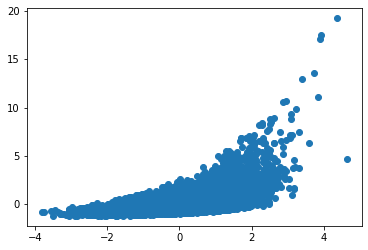

In [57]:
fig, ax = plt.subplots()

x = scaled_p_df['sqft_living']
y = scaled_p_df['price']


ax.scatter(x, y);

In [58]:
np.corrcoef(df['sqft_living'],df['price'])

array([[1.       , 0.7019173],
       [0.7019173, 1.       ]])

In [59]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_p_df['sqft_living']
y = scaled_p_df['price']

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

0.0

In [60]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_p_df[['sqft_living']]
y_s_p = scaled_p_df[['price']]

In [61]:
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(y_s_p)

preds

C:\Users\jsidd\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- sqft_living

  warnings.warn(message, FutureWarning)


array([[ 0.29709862],
       [ 0.36002903],
       [ 0.07350115],
       ...,
       [-0.42880776],
       [-0.37960762],
       [-0.26355413]])

In [62]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]

In [63]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]


In [64]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]
resids = y - preds
resids

,price
15502,0.19
1841,0.23
7083,0.05
21100,-0.07
14513,-0.19
...,...
11707,0.05
525,0.20
10941,-0.28
4776,-0.25


In [65]:
#Create out bins

bins = int( len(X)**.5)
bins

119

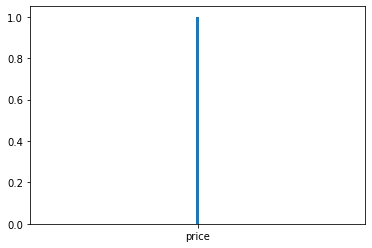

In [66]:
# Histogram of residuals

plt.hist(resids, bins=bins);

In [67]:
print(resids.max())
resids.min()

price   7.56
dtype: float64


price   -0.49
dtype: float64

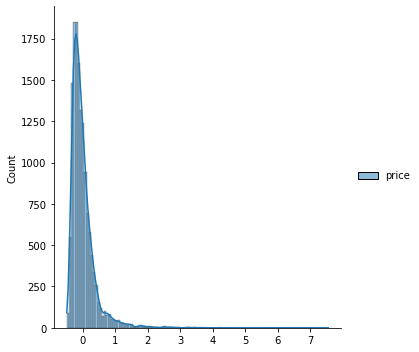

In [68]:
sns.displot(resids, bins=bins, kde=True)

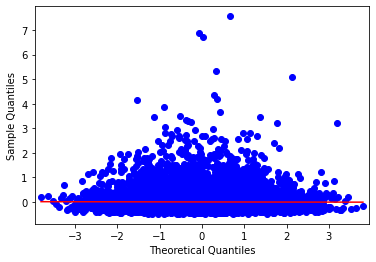

In [69]:
sm.qqplot(resids, line='r');

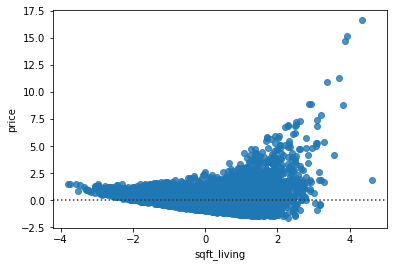

In [70]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

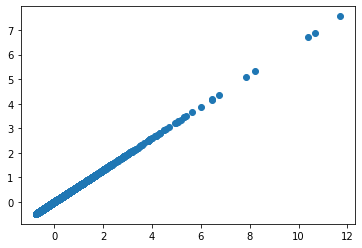

In [71]:
plt.scatter(preds, resids);

In [72]:
#Fit the dummy_regressor

dummy_lr.fit(X_s_p,y_s_p)

DummyRegressor()

In [73]:
# Score it

dummy_lr.score(X_s_p,y_s_p)

0.0

# Modeling

In [74]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_models = ols(formula = simple_formula,
                   data = scaled_p_df).fit()
simple_mod_summ = simple_models.summary()

simple_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     8367.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:18   Log-Likelihood:                -17008.
No. Observations:               14308   AIC:                         3.402e+04
Df Residuals:                   14306   BIC:                         3.403e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.197e-17      0.007  -1.23e-14      1.000      -0.013       0.013
sqft_living     0.6075      0.007     91.470      0.000       0.594       0.620
==============================================================================
Omnibus:                    13673.175   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1523853.432
Skew:                           4.317   Prob(JB):                         0.00
Kurtosis:                      52.815   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

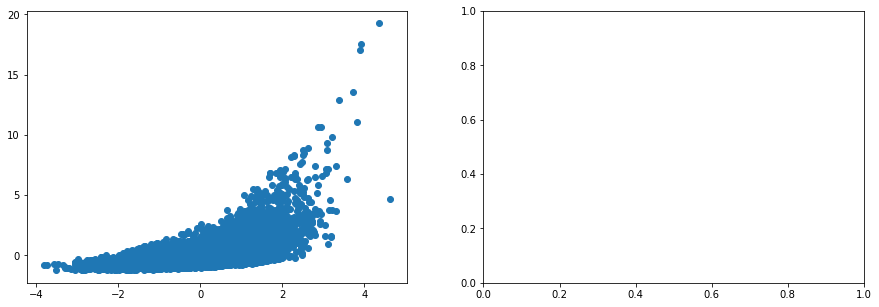

In [75]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

x1 = scaled_p_df[['sqft_living']]
y1 = scaled_p_df[['price']]

# x2 = scaled_and_parse_df[['bedrooms']]

ax[0].scatter(x1, y1)
# ax[1].scatter(x2,y1);

In [76]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     1894.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:18   Log-Likelihood:                -13870.
No. Observations:               14308   AIC:                         2.776e+04
Df Residuals:                   14296   BIC:                         2.786e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4268      0.031     45.574      0.000       1.365       1.488
sqft_living             0.2739      0.008     34.648      0.000       0.258       0.289
view_GOOD              -0.0036      0.039     -0.091      0.927      -0.081       0.074
view_NONE              -0.5640      0.021    -27.011      0.000      -0.605      -0.523
grade_11_Excellent      0.9718      0.047     20.866      0.000       0.881       1.063
grade_12_Luxury         2.8057      0.084     33.510      0.000       2.642       2.970
grade_13_Mansion        8.6000      0.227     37.811      0.000       8.154       9.046
grade_5_Fair           -1.2064      0.060    -20.089      0.000      -1.324      -1.089
grade_6_Low_Average    -1.1901      0.035    -34.017      0.000      -1.259      -1.122
grade_7_Average        -1.1569      0.028    -41.416      0.000      -1.212      -1.102
grade_8_Good           -0.9887      0.027    -37.199      0.000      -1.041      -0.937
grade_9_Better         -0.5662      0.028    -20.303      0.000      -0.621      -0.512
==============================================================================
Omnibus:                    10077.069   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           593984.198
Skew:                           2.769   Prob(JB):                         0.00
Kurtosis:                      34.075   Cond. No.                         62.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
simple_formula4 = 'price ~  view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     1811.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:18   Log-Likelihood:                -14447.
No. Observations:               14308   AIC:                         2.892e+04
Df Residuals:                   14297   BIC:                         2.900e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.8268      0.030     60.294      0.000       1.767       1.886
view_GOOD               0.0211      0.041      0.514      0.607      -0.059       0.101
view_NONE              -0.6290      0.022    -29.049      0.000      -0.671      -0.587
grade_11_Excellent      1.1359      0.048     23.548      0.000       1.041       1.230
grade_12_Luxury         3.1140      0.087     35.928      0.000       2.944       3.284
grade_13_Mansion        9.1197      0.236     38.597      0.000       8.657       9.583
grade_5_Fair           -2.0161      0.058    -35.003      0.000      -2.129      -1.903
grade_6_Low_Average    -1.8619      0.030    -61.412      0.000      -1.921      -1.803
grade_7_Average        -1.6007      0.026    -61.934      0.000      -1.651      -1.550
grade_8_Good           -1.2660      0.026    -47.981      0.000      -1.318      -1.214
grade_9_Better         -0.6651      0.029    -23.028      0.000      -0.722      -0.608
==============================================================================
Omnibus:                    10042.153   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           577285.151
Skew:                           2.762   Prob(JB):                         0.00
Kurtosis:                      33.624   Cond. No.                         62.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
simple_formula4 = 'price ~ sqft_living + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2078.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:18   Log-Likelihood:                -14318.
No. Observations:               14308   AIC:                         2.866e+04
Df Residuals:                   14298   BIC:                         2.873e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9548      0.026     36.636      0.000       0.904       1.006
sqft_living             0.3005      0.008     37.070      0.000       0.285       0.316
grade_11_Excellent      1.0329      0.048     21.517      0.000       0.939       1.127
grade_12_Luxury         2.9383      0.086     34.066      0.000       2.769       3.107
grade_13_Mansion        8.7729      0.235     37.399      0.000       8.313       9.233
grade_5_Fair           -1.2181      0.062    -19.661      0.000      -1.340      -1.097
grade_6_Low_Average    -1.2270      0.036    -34.016      0.000      -1.298      -1.156
grade_7_Average        -1.2097      0.029    -42.062      0.000      -1.266      -1.153
grade_8_Good           -1.0260      0.027    -37.463      0.000      -1.080      -0.972
grade_9_Better         -0.5855      0.029    -20.356      0.000      -0.642      -0.529
==============================================================================
Omnibus:                    10299.065   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           585912.046
Skew:                           2.879   Prob(JB):                         0.00
Kurtosis:                      33.816   Cond. No.                         48.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     3360.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:18   Log-Likelihood:                -16487.
No. Observations:               14308   AIC:                         3.298e+04
Df Residuals:                   14304   BIC:                         3.301e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6557      0.024     27.439      0.000       0.609       0.702
sqft_living     0.5577      0.007     84.701      0.000       0.545       0.571
view_GOOD      -0.0051      0.047     -0.107      0.914      -0.098       0.088
view_NONE      -0.7272      0.025    -29.183      0.000      -0.776      -0.678
==============================================================================
Omnibus:                    13541.862   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1593711.047
Skew:                           4.224   Prob(JB):                         0.00
Kurtosis:                      54.009   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
no_y_train_df = scaled_p_df.drop(columns = 'price')

In [81]:
len(y_train)

14308

In [82]:
len(no_y_train_df)

14308

In [83]:
all_var = sm.OLS(y_train, sm.add_constant(no_y_train_df)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     488.1
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:19   Log-Likelihood:            -1.9641e+05
No. Observations:               14308   AIC:                         3.929e+05
Df Residuals:                   14254   BIC:                         3.933e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.664e+16   1.13e+17      0.414      0.679   -1.74e+17    2.67e+17
bedrooms_1           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_10          1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_2           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_3           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_33          1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_4           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_5           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_6           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_7           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_8           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bedrooms_9           1.073e+16   6.89e+16      0.156      0.876   -1.24e+17    1.46e+17
bathrooms_0.5       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_0.75      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_1.0       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_1.25      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_1.5       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_1.75      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_2.0       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_2.25      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_2.5       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_2.75      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_3.0       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_3.25      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_3.5       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_3.75      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_4.0       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_4.25      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_4.5       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_4.75      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_5.0       -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bathrooms_5.25      -5.736e+16   8.81e+16     -0.651      0.515    -2.3e+17    1.15e+17
bat

In [84]:
no_bathrooms = no_y_train_df[no_y_train_df.columns.drop(list(no_y_train_df.filter(regex='bathrooms')))]

In [85]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     914.1
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:19   Log-Likelihood:            -1.9698e+05
No. Observations:               14308   AIC:                         3.940e+05
Df Residuals:                   14282   BIC:                         3.942e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.232e+16   7.27e+16     -0.307      0.759   -1.65e+17     1.2e+17
bedrooms_1           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_10          2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_2           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_3           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_33          2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_4           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_5           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_6           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_7           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_8           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
bedrooms_9           2.232e+16   7.27e+16      0.307      0.759    -1.2e+17    1.65e+17
view_AVERAGE        -5.957e+04   1.84e+04     -3.239      0.001   -9.56e+04   -2.35e+04
view_EXCELLENT       3.323e+05   2.27e+04     14.628      0.000    2.88e+05    3.77e+05
view_GOOD            3.409e+04   2.02e+04      1.685      0.092   -5566.478    7.37e+04
view_NONE            -1.77e+05   1.62e+04    -10.954      0.000   -2.09e+05   -1.45e+05
grade_10_Very_Good   4.611e+05   5.71e+04      8.082      0.000    3.49e+05    5.73e+05
grade_11_Excellent   8.037e+05   5.86e+04     13.726      0.000    6.89e+05    9.18e+05
grade_12_Luxury       1.42e+06   6.41e+04     22.153      0.000    1.29e+06    1.55e+06
grade_13_Mansion     3.505e+06      1e+05     34.975      0.000    3.31e+06     3.7e+06
grade_5_Fair        -2.533e+04   5.78e+04     -0.438      0.661   -1.39e+05     8.8e+04
grade_6_Low_Average -2420.1685   5.57e+04     -0.043      0.965   -1.12e+05    1.07e+05
grade_7_Average       2.76e+04   5.58e+04      0.495      0.621   -8.17e+04    1.37e+05
grade_8_Good         9.183e+04    5.6e+04      1.639      0.101    -1.8e+04    2.02e+05
grade_9_Better       2.478e+05   5.64e+04      4.390      0.000    1.37e+05    3.58e+05
sqft_living          1.064e+05   3678.826     28.935      0.000    9.92e+04    1.14e+05
sqft_lot            -1.256e+04   1969.938     -6.376      0.000   -1.64e+04   -8699.185
==============================================================================
Omnibus:                     9965.977   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           664193.656
Skew:                           2.680   Prob(JB):                         0.00
Kurtosis:                      35.945   Cond. No.                     2.06e+14
================================================

In [86]:
no_bathrooms_bedrooms = no_bathrooms[no_bathrooms.columns.drop(\
                                    list(no_bathrooms.filter(regex= 'bedrooms')))]

In [87]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1481.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:19   Log-Likelihood:            -1.9710e+05
No. Observations:               14308   AIC:                         3.942e+05
Df Residuals:                   14292   BIC:                         3.944e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 6.41e+05   5.73e+04     11.177      0.000    5.29e+05    7.53e+05
view_AVERAGE         -6.19e+04   1.85e+04     -3.337      0.001   -9.83e+04   -2.55e+04
view_EXCELLENT       3.376e+05   2.29e+04     14.748      0.000    2.93e+05    3.83e+05
view_GOOD            3.262e+04   2.04e+04      1.599      0.110   -7364.697    7.26e+04
view_NONE           -1.846e+05   1.63e+04    -11.340      0.000   -2.17e+05   -1.53e+05
grade_10_Very_Good   4.168e+05   5.67e+04      7.353      0.000    3.06e+05    5.28e+05
grade_11_Excellent   7.666e+05   5.82e+04     13.163      0.000    6.52e+05    8.81e+05
grade_12_Luxury      1.396e+06   6.39e+04     21.840      0.000    1.27e+06    1.52e+06
grade_13_Mansion     3.514e+06      1e+05     34.970      0.000    3.32e+06    3.71e+06
grade_5_Fair        -4.807e+04   5.79e+04     -0.831      0.406   -1.61e+05    6.54e+04
grade_6_Low_Average -4.099e+04   5.54e+04     -0.741      0.459   -1.49e+05    6.75e+04
grade_7_Average     -2.477e+04   5.53e+04     -0.448      0.654   -1.33e+05    8.36e+04
grade_8_Good         4.058e+04   5.56e+04      0.730      0.465   -6.84e+04     1.5e+05
grade_9_Better       1.993e+05   5.61e+04      3.556      0.000    8.95e+04    3.09e+05
sqft_living          9.794e+04   2959.443     33.095      0.000    9.21e+04    1.04e+05
sqft_lot            -1.248e+04   1981.124     -6.298      0.000   -1.64e+04   -8593.969
==============================================================================
Omnibus:                    10031.615   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           671157.902
Skew:                           2.707   Prob(JB):                         0.00
Kurtosis:                      36.113   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
no_bathrooms_bedrooms_lot = no_bathrooms_bedrooms.drop(columns = 'sqft_lot')

In [89]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms_lot)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     1579.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        11:40:19   Log-Likelihood:            -1.9712e+05
No. Observations:               14308   AIC:                         3.943e+05
Df Residuals:                   14293   BIC:                         3.944e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.366e+05   5.74e+04     11.086      0.000    5.24e+05    7.49e+05
view_AVERAGE        -6.511e+04   1.86e+04     -3.507      0.000   -1.02e+05   -2.87e+04
view_EXCELLENT       3.361e+05   2.29e+04     14.660      0.000    2.91e+05    3.81e+05
view_GOOD            2.565e+04   2.04e+04      1.258      0.209   -1.43e+04    6.56e+04
view_NONE           -1.866e+05   1.63e+04    -11.448      0.000   -2.19e+05   -1.55e+05
grade_10_Very_Good   4.229e+05   5.68e+04      7.451      0.000    3.12e+05    5.34e+05
grade_11_Excellent   7.695e+05   5.83e+04     13.196      0.000    6.55e+05    8.84e+05
grade_12_Luxury      1.398e+06    6.4e+04     21.846      0.000    1.27e+06    1.52e+06
grade_13_Mansion     3.521e+06   1.01e+05     35.000      0.000    3.32e+06    3.72e+06
grade_5_Fair        -4.884e+04   5.79e+04     -0.843      0.399   -1.62e+05    6.47e+04
grade_6_Low_Average -3.638e+04   5.54e+04     -0.656      0.512   -1.45e+05    7.23e+04
grade_7_Average     -1.815e+04   5.54e+04     -0.328      0.743   -1.27e+05    9.04e+04
grade_8_Good         4.809e+04   5.56e+04      0.864      0.387    -6.1e+04    1.57e+05
grade_9_Better       2.061e+05   5.61e+04      3.673      0.000    9.61e+04    3.16e+05
sqft_living          9.599e+04   2947.049     32.570      0.000    9.02e+04    1.02e+05
==============================================================================
Omnibus:                    10072.224   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           675083.919
Skew:                           2.724   Prob(JB):                         0.00
Kurtosis:                      36.207   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No log transformation
- sqft_living = .488
- sqft_living+ view + grade = .593
- view + grade = .535
- sqft_living + grade = .570
- living + view = .517
- view + grade + bedroom + bathroom + living + lot = .614
- view + grade + living + bedrooms + lot = .614
- view + grade + living + lot = .613
- view + grade + living = .612


Post log transformation
- sqft_living = .368
- sqft_living+ view + grade = .571
- view + grade = .535
- sqft_living + grade = .544
- living + view = .414
- view + grade + bedroom + bathroom + living + lot = .592 (bedroom & bathroom are multicollinear)
- view + grade + living + bedrooms + lot = .592 (we get the same adj r-sqr because bedroom & bathroom are multicollinear)
- view + grade + living + lot = .592
- view + grade + living = .591

## Testing Data

In [90]:
# Can now predict for our test set!
simple_test_preds = simple_model.predict(sm.add_constant(X_test['sqft_living']))
simple_test_preds

14835    407958.49
6997      -6016.73
16157    667501.74
18910    376855.40
8247     764183.98
           ...    
1625     850693.45
19832   1010440.32
18050    318053.13
20411    586549.94
10418    669705.90
Length: 7048, dtype: float64

In [93]:
r2_score(y_test,simple_test_preds)

0.38482167921745025

In [94]:
r2_score(y_train,simple_train_preds)

0.36902244016762176

Our simple model appears to under perform our test model by .02.

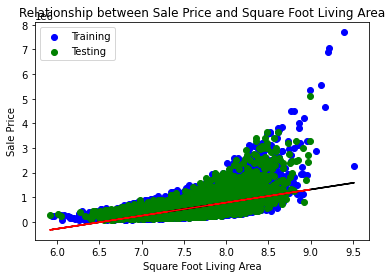

In [95]:
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['sqft_living'], train_df['price'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['sqft_living'], test_df['price'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['sqft_living'], simple_test_preds, color='red')

plt.ylabel('Sale Price')
plt.xlabel('Square Foot Living Area')
plt.title('Relationship between Sale Price and Square Foot Living Area')
plt.legend()
plt.show()

In [96]:
test_df.grade = [x.replace(" ", "_").strip() for x in test_df.grade]

In [97]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7048 entries, 14835 to 10418
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     7048 non-null   object 
 1   bathrooms    7048 non-null   object 
 2   sqft_living  7048 non-null   float64
 3   sqft_lot     7048 non-null   int64  
 4   view         7048 non-null   object 
 5   grade        7048 non-null   object 
 6   price        7048 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 440.5+ KB


In [98]:
# Transform training data
X_test_scaled = ct.transform(test_df)
X_test_scaled

ValueError: Found unknown categories ['11'] in column 0 during transform

In [ ]:
X_test_scale = pd.DataFrame(X_test_scaled, columns = ct.get_feature_names_out())

In [ ]:
X_test_scale.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]

In [ ]:
#Convert to a function or loop
X_test_scale.sqft_living = X_test_scale.sqft_living.astype(float)
X_test_scale.sqft_lot = X_test_scale.sqft_lot.astype(float)
X_test_scale.price = X_test_scale.price.astype(float)

In [ ]:
X_test_scale.info()

In [ ]:
X_test_enc = ct.transform(X_test_scale)
X_test_enc

In [ ]:
scaled_test_df= pd.DataFrame(X_test_enc.todense(), columns= ct.get_feature_names_out(), index = y_test.index)

In [ ]:
scaled_test_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_test_df.columns]

In [ ]:
scaled_test_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

In [ ]:
scaled_test_df.head()

In [ ]:
test_model =scaled_test_df.drop(columns = ['price', 'bedrooms', 'zipcode', 'bathrooms', 'yr_built'])

In [ ]:
test_model.shape

In [135]:
no_zip_yr_built_bathrooms_bedrooms.shape

NameError: name 'no_zip_yr_built_bathrooms_bedrooms' is not defined

In [137]:
## Example function to fit, score model, and return score model & r2_score

def scores(y,x):
    model = LinearRegression()
    model.fit(y,x)
    
    return
    result1 = model.score(y,x)
    result2 = r2_score(y,x)
    print("Model score is", result1)
    print("r2_score is", result2)
    

In [ ]:
# Set up and fit your model
model = LinearRegression()

model.fit(no_zip_yr_built_bathrooms_bedrooms, y_train)

In [ ]:
model.score(no_zip_yr_built_bathrooms_bedrooms, y_train)

In [ ]:
model.score(test_model, y_test)

In [ ]:
train_preds = model.predict(no_zip_yr_built_bathrooms_bedrooms)

test_preds = model.predict(test_model)

In [ ]:
r2_score(y_train, train_preds)

In [ ]:
r2_score(y_test, test_preds)

Our model explained the test variance better than our train by about 3%.